In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("dataset.csv")

C:\Users\hi\AppData\Local\Temp\ipykernel_18488\4094402781.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataset.csv")


In [3]:
df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [5]:

df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [6]:
df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [7]:
df['full_name'].nunique()

958524

In [8]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['full_name'] = lab.fit_transform(df['full_name'])
df['name'] = lab.fit_transform(df['name'])
df['neo'] = lab.fit_transform(df['neo'])
df['pha'] = lab.fit_transform(df['pha'])
df['class'] = lab.fit_transform(df['class'])
df['orbit_id'] = lab.fit_transform(df['orbit_id'])
df['equinox'] = lab.fit_transform(df['equinox'])



In [9]:
df=df.drop(["id","full_name","name","pdes","prefix"],axis=1)


In [10]:
df['H'] = lab.fit_transform(df['H'])
df['a'] = lab.fit_transform(df['a'])
df['q'] = lab.fit_transform(df['q'])
df['i'] = lab.fit_transform(df['i'])
df['w'] = lab.fit_transform(df['w'])
df['om'] = lab.fit_transform(df['om'])
df['ma'] = lab.fit_transform(df['ma'])
df['ad'] = lab.fit_transform(df['ad'])
df['n'] = lab.fit_transform(df['n'])
df['tp'] = lab.fit_transform(df['tp'])
df['per'] = lab.fit_transform(df['per'])
df['moid'] = lab.fit_transform(df['moid'])
df['rms'] = lab.fit_transform(df['rms'])
df['epoch'] = lab.fit_transform(df['epoch'])


In [11]:
df['sigma_ad'] = lab.fit_transform(df['sigma_ad'])
df['sigma_n'] = lab.fit_transform(df['sigma_n'])
df['sigma_tp'] = lab.fit_transform(df['sigma_tp'])
df['sigma_per'] = lab.fit_transform(df['sigma_per'])

In [12]:
df['diameter'] = lab.fit_transform(df['diameter'])
df['albedo'] = lab.fit_transform(df['albedo'])
df['diameter_sigma'] = lab.fit_transform(df['diameter_sigma'])
df['epoch_cal'] = lab.fit_transform(df['epoch_cal'])
df['e'] = lab.fit_transform(df['e'])
df['tp_cal'] = lab.fit_transform(df['tp_cal'])
df['per_y'] = lab.fit_transform(df['per_y'])
df['moid_ld'] = lab.fit_transform(df['moid_ld'])
df['sigma_e'] = lab.fit_transform(df['sigma_e'])
df['sigma_a'] = lab.fit_transform(df['sigma_a'])
df['sigma_q'] = lab.fit_transform(df['sigma_q'])
df['sigma_i'] = lab.fit_transform(df['sigma_i'])
df['sigma_om'] = lab.fit_transform(df['sigma_om'])
df['sigma_w'] = lab.fit_transform(df['sigma_w'])
df['sigma_ma'] = lab.fit_transform(df['sigma_ma'])


In [13]:
df

,spkid,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,0,0,11,16590,230,200,517,4925,58600,...,0,0,0,0,0,0,0,0,8,23126
1,2000002,0,0,18,16588,246,3034,494,5245,59000,...,3517,407,130,6643,909,82,11026,1493,8,15868
2,2000003,0,0,32,16577,418,3028,323,5245,59000,...,1567,9676,2519,4361,746,72,6846,1180,8,13933
3,2000004,0,0,8,16587,659,200,489,4925,58600,...,5,3,1,29,135,25,47,353,8,19814
4,2000005,0,0,189,16377,499,2663,325,5245,59000,...,223,21979,13685,4887,841,136,6483,1367,8,32016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,3246801,0,0,3690,16591,1057,3054,524,4,37203,...,211075,215008,251904,254135,261703,245045,278400,274854,8,6732
958520,3246834,0,0,5055,16591,1057,3054,224,5245,59000,...,74243,49010,97194,100881,32084,23937,103832,45698,8,33458
958521,3013075,1,1,6949,16591,1057,3054,72,5245,59000,...,77141,49940,73302,54138,110393,87951,85426,117064,1,31381
958522,3246457,0,0,4626,16591,1057,3054,470,6,41956,...,199217,213727,247714,249559,261198,244653,271369,274308,8,7719


In [14]:
df.fillna(value=0,inplace=True)

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=1/3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=1/2,random_state=42)

In [17]:
# build a tree
decision_tree_model= DecisionTreeRegressor(max_depth=3)
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   spkid           958524 non-null  int64
 1   neo             958524 non-null  int32
 2   pha             958524 non-null  int32
 3   H               958524 non-null  int64
 4   diameter        958524 non-null  int64
 5   albedo          958524 non-null  int64
 6   diameter_sigma  958524 non-null  int64
 7   orbit_id        958524 non-null  int32
 8   epoch           958524 non-null  int64
 9   epoch_mjd       958524 non-null  int64
 10  epoch_cal       958524 non-null  int64
 11  equinox         958524 non-null  int32
 12  e               958524 non-null  int64
 13  a               958524 non-null  int64
 14  q               958524 non-null  int64
 15  i               958524 non-null  int64
 16  om              958524 non-null  int64
 17  w               958524 non-null  int64
 18  ma  

In [19]:
df

,spkid,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,0,0,11,16590,230,200,517,4925,58600,...,0,0,0,0,0,0,0,0,8,23126
1,2000002,0,0,18,16588,246,3034,494,5245,59000,...,3517,407,130,6643,909,82,11026,1493,8,15868
2,2000003,0,0,32,16577,418,3028,323,5245,59000,...,1567,9676,2519,4361,746,72,6846,1180,8,13933
3,2000004,0,0,8,16587,659,200,489,4925,58600,...,5,3,1,29,135,25,47,353,8,19814
4,2000005,0,0,189,16377,499,2663,325,5245,59000,...,223,21979,13685,4887,841,136,6483,1367,8,32016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,3246801,0,0,3690,16591,1057,3054,524,4,37203,...,211075,215008,251904,254135,261703,245045,278400,274854,8,6732
958520,3246834,0,0,5055,16591,1057,3054,224,5245,59000,...,74243,49010,97194,100881,32084,23937,103832,45698,8,33458
958521,3013075,1,1,6949,16591,1057,3054,72,5245,59000,...,77141,49940,73302,54138,110393,87951,85426,117064,1,31381
958522,3246457,0,0,4626,16591,1057,3054,470,6,41956,...,199217,213727,247714,249559,261198,244653,271369,274308,8,7719


In [20]:
#evaluate the model
test_pred=decision_tree_model.predict(x_test)
test_loss=mean_squared_error(y_test,test_pred)
print(f"test_loss: {test_loss:.4f}")

test_loss: 63327430.6262


In [21]:
train_loss=mean_squared_error(y_train,decision_tree_model.predict(x_train))
val_loss=mean_squared_error(y_val,decision_tree_model.predict(x_val))
test_loss=mean_squared_error(y_test,decision_tree_model.predict(x_test))

In [22]:
print(r2_score(y_test,test_pred))

0.31188220333547834


In [24]:
dtree=DecisionTreeRegressor(max_depth=3)
dtree.fit(x,y)

DecisionTreeRegressor(max_depth=3)

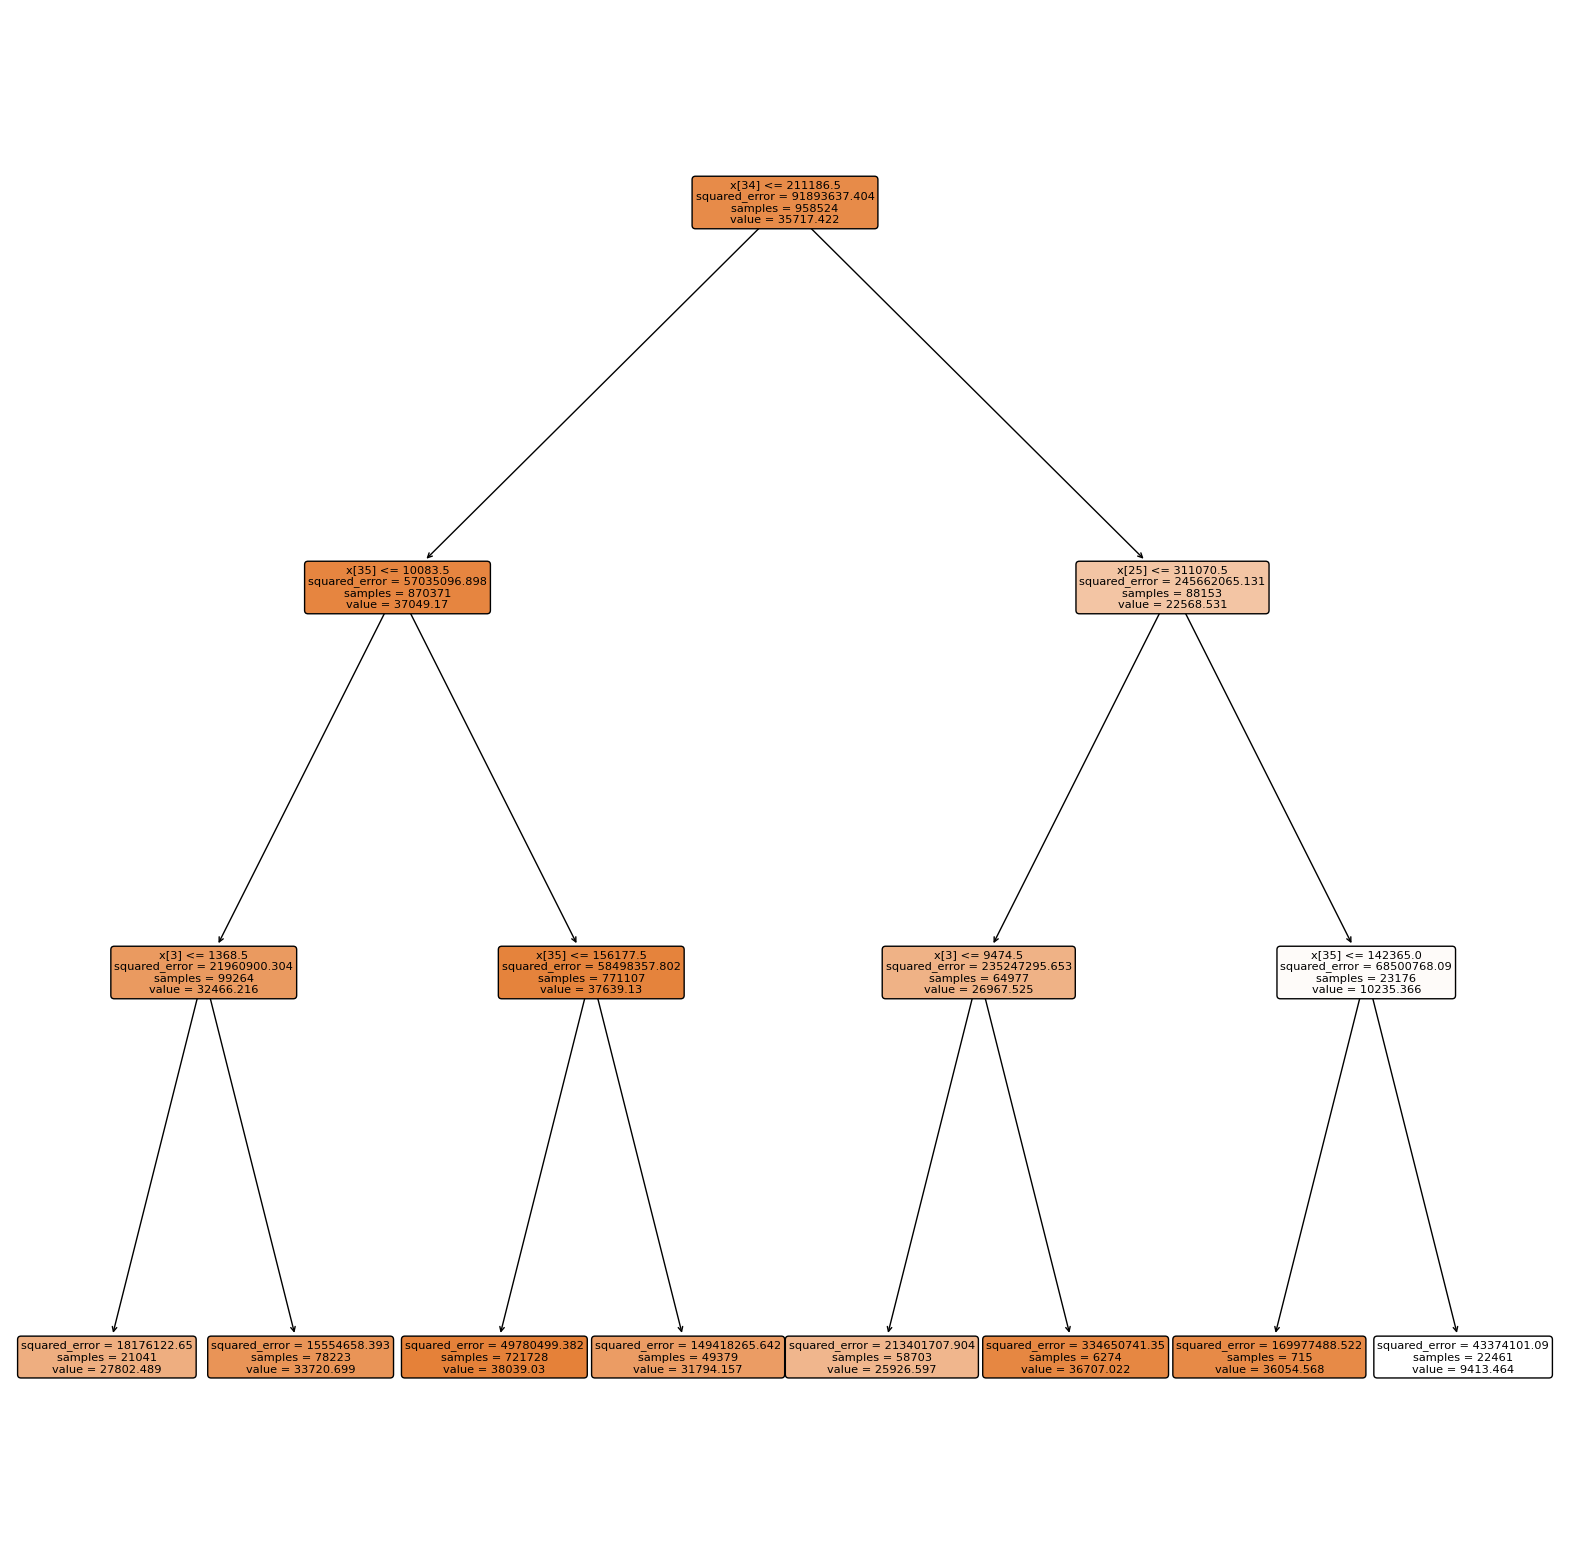

In [26]:
plt.figure(figsize=(20,20))
plot_tree(dtree,filled=True,rounded=True)
plt.show()